In [19]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import optuna

In [20]:
# 导入训练集和测试集
train_data = pd.read_excel(r'C:\Users\k\Desktop\硕士论文\ORP\ORP4\XGBoost\ORP_function_train.xlsx')
test_data = pd.read_excel(r'C:\Users\k\Desktop\硕士论文\ORP\ORP4\XGBoost\ORP_function_test.xlsx')
# 分离特征和目标变量
X_train, y_train = train_data.drop(['E','File'], axis=1), train_data['E']
X_test, y_test = test_data.drop(['E','File'], axis=1), test_data['E']

In [21]:
def objective(trial):
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.6),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    model = XGBRegressor(**param)
    
    # 使用k折交叉验证
    kf = KFold(n_splits=10, shuffle=True, random_state=99)
    rmse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        rmse_scores.append(rmse_fold)
    
    # 计算交叉验证的平均RMSE
    avg_rmse = np.mean(rmse_scores)
    
    return avg_rmse

In [22]:
# 创建Optuna试验
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-03-08 23:06:44,396] A new study created in memory with name: no-name-44c5c7e5-1328-41b1-a4ab-e73aaf6527b6
[I 2024-03-08 23:06:45,306] Trial 0 finished with value: 0.4528977785144105 and parameters: {'learning_rate': 0.6762346360365346, 'n_estimators': 424, 'max_depth': 2, 'min_child_weight': 6, 'gamma': 0.0051012230730408835, 'subsample': 0.6654561714448691, 'colsample_bytree': 0.8864886875801333}. Best is trial 0 with value: 0.4528977785144105.
[I 2024-03-08 23:06:46,026] Trial 1 finished with value: 0.40745457540415975 and parameters: {'learning_rate': 0.4083448271723202, 'n_estimators': 376, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.15386910678185164, 'subsample': 0.7129076802711352, 'colsample_bytree': 0.6244862123465207}. Best is trial 1 with value: 0.40745457540415975.
[I 2024-03-08 23:06:46,758] Trial 2 finished with value: 0.4265159516232707 and parameters: {'learning_rate': 0.09409189261314833, 'n_estimators': 392, 'max_depth': 2, 'min_child_weight': 5, 'gamma'

[I 2024-03-08 23:07:01,821] Trial 24 finished with value: 0.4217064117000402 and parameters: {'learning_rate': 0.4799307938524445, 'n_estimators': 397, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.46082171549853074, 'subsample': 0.6371192557626287, 'colsample_bytree': 0.9330634216060845}. Best is trial 22 with value: 0.3946184887352591.
[I 2024-03-08 23:07:02,629] Trial 25 finished with value: 0.39738835536411715 and parameters: {'learning_rate': 0.21160493450096932, 'n_estimators': 368, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.37645892440149764, 'subsample': 0.709161488343714, 'colsample_bytree': 0.8622076696324695}. Best is trial 22 with value: 0.3946184887352591.
[I 2024-03-08 23:07:03,478] Trial 26 finished with value: 0.4302143803472286 and parameters: {'learning_rate': 0.23278645479826293, 'n_estimators': 437, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.5022122557717056, 'subsample': 0.8195041919764093, 'colsample_bytree': 0.8669154902315716}. Best is trial 22

[I 2024-03-08 23:07:22,077] Trial 48 finished with value: 0.38648424527079633 and parameters: {'learning_rate': 0.4641934057074475, 'n_estimators': 398, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.04374466219790396, 'subsample': 0.8983609211304272, 'colsample_bytree': 0.7447360490504353}. Best is trial 48 with value: 0.38648424527079633.
[I 2024-03-08 23:07:22,921] Trial 49 finished with value: 0.42734859764466326 and parameters: {'learning_rate': 0.5390915667634755, 'n_estimators': 394, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.044271849546863196, 'subsample': 0.9291570719070021, 'colsample_bytree': 0.6994316166680653}. Best is trial 48 with value: 0.38648424527079633.
[I 2024-03-08 23:07:23,822] Trial 50 finished with value: 0.4524017968798505 and parameters: {'learning_rate': 0.874320807808896, 'n_estimators': 474, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.16380389064886558, 'subsample': 0.97130175955214, 'colsample_bytree': 0.7445178994476073}. Best is trial 4

[I 2024-03-08 23:07:43,120] Trial 72 finished with value: 0.4088141141755819 and parameters: {'learning_rate': 0.4198109517542135, 'n_estimators': 367, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.03949755074737321, 'subsample': 0.8330205040411435, 'colsample_bytree': 0.808592612127766}. Best is trial 71 with value: 0.3792037832998397.
[I 2024-03-08 23:07:43,977] Trial 73 finished with value: 0.40187901916060653 and parameters: {'learning_rate': 0.40130628760086823, 'n_estimators': 424, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.14654828944673798, 'subsample': 0.912518787889972, 'colsample_bytree': 0.7398294758145101}. Best is trial 71 with value: 0.3792037832998397.
[I 2024-03-08 23:07:44,814] Trial 74 finished with value: 0.3990303821155615 and parameters: {'learning_rate': 0.3684839231310034, 'n_estimators': 353, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.05337604260932812, 'subsample': 0.6177089980467283, 'colsample_bytree': 0.7614523757694445}. Best is trial 71 

[I 2024-03-08 23:08:03,483] Trial 96 finished with value: 0.3825140260911427 and parameters: {'learning_rate': 0.04698516413383437, 'n_estimators': 380, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.11757806087618361, 'subsample': 0.6776535447720805, 'colsample_bytree': 0.8318798046061866}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:04,345] Trial 97 finished with value: 0.4001003095783071 and parameters: {'learning_rate': 0.057426728343666175, 'n_estimators': 381, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.14151062373494003, 'subsample': 0.7177700668620112, 'colsample_bytree': 0.7896651635020089}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:05,307] Trial 98 finished with value: 0.3888972141219337 and parameters: {'learning_rate': 0.04062588442497759, 'n_estimators': 398, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.1168142420549145, 'subsample': 0.6468226011328034, 'colsample_bytree': 0.8360586289592036}. Best is trial 

[I 2024-03-08 23:08:22,982] Trial 120 finished with value: 0.3954023569828516 and parameters: {'learning_rate': 0.14425667760498662, 'n_estimators': 302, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.0800149739813702, 'subsample': 0.6188116461444266, 'colsample_bytree': 0.8491253662523509}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:23,746] Trial 121 finished with value: 0.38771657445489216 and parameters: {'learning_rate': 0.08514173498287228, 'n_estimators': 288, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.12157486198313701, 'subsample': 0.6009558881505305, 'colsample_bytree': 0.9051537950101652}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:24,426] Trial 122 finished with value: 0.40568009224115364 and parameters: {'learning_rate': 0.11333863261135585, 'n_estimators': 274, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.11650336958931075, 'subsample': 0.6005714264074901, 'colsample_bytree': 0.8700510752902533}. Best is tr

[I 2024-03-08 23:08:41,909] Trial 144 finished with value: 0.3921825975629953 and parameters: {'learning_rate': 0.10282554976030718, 'n_estimators': 315, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.0545930148049715, 'subsample': 0.6639599759597563, 'colsample_bytree': 0.8953759745328462}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:42,649] Trial 145 finished with value: 0.38697560394822106 and parameters: {'learning_rate': 0.046516595348228315, 'n_estimators': 262, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.07289384434801871, 'subsample': 0.696712353961853, 'colsample_bytree': 0.8812951707146695}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:43,327] Trial 146 finished with value: 0.39499377159193844 and parameters: {'learning_rate': 0.033442149218502026, 'n_estimators': 247, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.07433370004329311, 'subsample': 0.6971181248466077, 'colsample_bytree': 0.890593118847419}. Best is tr

[I 2024-03-08 23:08:58,101] Trial 168 finished with value: 0.387162127414486 and parameters: {'learning_rate': 0.06610550543029221, 'n_estimators': 200, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.02457994273658696, 'subsample': 0.6850474742358238, 'colsample_bytree': 0.9529987418708055}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:58,714] Trial 169 finished with value: 0.38523363965967244 and parameters: {'learning_rate': 0.07264607545125341, 'n_estimators': 185, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02403832276183033, 'subsample': 0.6842170015953434, 'colsample_bytree': 0.9565517454129961}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:08:59,340] Trial 170 finished with value: 0.40017794991976585 and parameters: {'learning_rate': 0.023628540981157187, 'n_estimators': 206, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.05079173868779666, 'subsample': 0.7175040726883899, 'colsample_bytree': 0.9704102526028178}. Best is t

[I 2024-03-08 23:09:11,060] Trial 192 finished with value: 0.3857745760561759 and parameters: {'learning_rate': 0.07289141113542755, 'n_estimators': 149, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.05729501347743017, 'subsample': 0.678352828156257, 'colsample_bytree': 0.9904119880756166}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:09:11,552] Trial 193 finished with value: 0.392067381604413 and parameters: {'learning_rate': 0.03789352426366521, 'n_estimators': 150, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.05708443156341731, 'subsample': 0.6756285554702111, 'colsample_bytree': 0.9894115246479147}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:09:12,028] Trial 194 finished with value: 0.3934039804613981 and parameters: {'learning_rate': 0.07533383200749676, 'n_estimators': 149, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.05958943718903734, 'subsample': 0.6639941603587588, 'colsample_bytree': 0.9934025752095147}. Best is trial

[I 2024-03-08 23:09:24,207] Trial 216 finished with value: 0.3852410108009039 and parameters: {'learning_rate': 0.05588369298258944, 'n_estimators': 206, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.029211562480423874, 'subsample': 0.7062571627210086, 'colsample_bytree': 0.9287447007470179}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:09:24,870] Trial 217 finished with value: 0.3827014053161974 and parameters: {'learning_rate': 0.04772915291892055, 'n_estimators': 204, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02413144131664839, 'subsample': 0.7101099040202957, 'colsample_bytree': 0.9289908050811511}. Best is trial 75 with value: 0.3790008947350972.
[I 2024-03-08 23:09:25,487] Trial 218 finished with value: 0.38479719955439745 and parameters: {'learning_rate': 0.041358023354127776, 'n_estimators': 201, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.016600944137806894, 'subsample': 0.7071895345380943, 'colsample_bytree': 0.9291502906776636}. Best is

[I 2024-03-08 23:09:39,374] Trial 240 finished with value: 0.40818011046016645 and parameters: {'learning_rate': 0.017850760440650176, 'n_estimators': 212, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.04162975225100372, 'subsample': 0.7577481412669832, 'colsample_bytree': 0.9256545362467846}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:09:40,024] Trial 241 finished with value: 0.3837485276736877 and parameters: {'learning_rate': 0.056143433423626515, 'n_estimators': 218, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02228803748973326, 'subsample': 0.7122389725683531, 'colsample_bytree': 0.9385748945321869}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:09:40,714] Trial 242 finished with value: 0.3834392104641844 and parameters: {'learning_rate': 0.047912215267270596, 'n_estimators': 217, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02445894358442398, 'subsample': 0.7108770970118773, 'colsample_bytree': 0.9152966671337218}. Best 

[I 2024-03-08 23:09:54,260] Trial 264 finished with value: 0.3952383420771673 and parameters: {'learning_rate': 0.0751829567702467, 'n_estimators': 193, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.03161917646673429, 'subsample': 0.7197548734850762, 'colsample_bytree': 0.9093190835095117}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:09:55,062] Trial 265 finished with value: 0.3892530164043533 and parameters: {'learning_rate': 0.04359690189749577, 'n_estimators': 228, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.015024621261003672, 'subsample': 0.7771814361798837, 'colsample_bytree': 0.8261146578762281}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:09:56,013] Trial 266 finished with value: 0.38202353503745146 and parameters: {'learning_rate': 0.06070351983168212, 'n_estimators': 387, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.04299370833445977, 'subsample': 0.7131442436571629, 'colsample_bytree': 0.962380997014941}. Best is t

[I 2024-03-08 23:10:11,630] Trial 288 finished with value: 0.3952383351809474 and parameters: {'learning_rate': 0.02154199899053766, 'n_estimators': 224, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.04113132024334972, 'subsample': 0.7074995611221406, 'colsample_bytree': 0.9331627360018792}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:12,271] Trial 289 finished with value: 0.3799210778954283 and parameters: {'learning_rate': 0.05648163083115313, 'n_estimators': 186, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.008594480868510338, 'subsample': 0.6834991098196662, 'colsample_bytree': 0.907524615813837}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:12,936] Trial 290 finished with value: 0.38615647507580403 and parameters: {'learning_rate': 0.07691518158849023, 'n_estimators': 183, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.0028057187838050855, 'subsample': 0.6922987467545445, 'colsample_bytree': 0.9130768611228613}. Best i

[I 2024-03-08 23:10:27,535] Trial 312 finished with value: 0.3822969444620669 and parameters: {'learning_rate': 0.0541186719995663, 'n_estimators': 223, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.032887022813296724, 'subsample': 0.7007620458729923, 'colsample_bytree': 0.937291935785014}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:28,205] Trial 313 finished with value: 0.38686431112726904 and parameters: {'learning_rate': 0.10328226608427846, 'n_estimators': 228, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.0308850430940717, 'subsample': 0.6723784647854633, 'colsample_bytree': 0.9830191935494909}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:29,694] Trial 314 finished with value: 0.5022548699132097 and parameters: {'learning_rate': 0.002583415879514009, 'n_estimators': 500, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.011959186739753647, 'subsample': 0.8745252248799912, 'colsample_bytree': 0.9104226281723383}. Best is 

[I 2024-03-08 23:10:44,653] Trial 336 finished with value: 0.3909876135166523 and parameters: {'learning_rate': 0.03030065969654891, 'n_estimators': 221, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02411349922725211, 'subsample': 0.6630208369843039, 'colsample_bytree': 0.9414507540722733}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:45,830] Trial 337 finished with value: 0.39256081473795434 and parameters: {'learning_rate': 0.06288796346918997, 'n_estimators': 385, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.0002833099942399324, 'subsample': 0.6849908921309252, 'colsample_bytree': 0.9281231830242822}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:10:46,595] Trial 338 finished with value: 0.38889778779757667 and parameters: {'learning_rate': 0.09002917020929935, 'n_estimators': 234, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.01837766539848022, 'subsample': 0.7043259170430309, 'colsample_bytree': 0.8983033676415025}. Best 

[I 2024-03-08 23:10:59,402] Trial 360 finished with value: 0.3858243124298672 and parameters: {'learning_rate': 0.2398278040892576, 'n_estimators': 209, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02479517741679469, 'subsample': 0.6969002304204952, 'colsample_bytree': 0.9478775421620401}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:11:00,034] Trial 361 finished with value: 0.38826375416027653 and parameters: {'learning_rate': 0.10419768788412427, 'n_estimators': 196, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.009637809830173196, 'subsample': 0.7240369533544535, 'colsample_bytree': 0.7500330274906339}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:11:00,657] Trial 362 finished with value: 0.3894984771363779 and parameters: {'learning_rate': 0.07874184598157695, 'n_estimators': 183, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.02206447023117265, 'subsample': 0.83881097652944, 'colsample_bytree': 0.9999675549920908}. Best is tr

[I 2024-03-08 23:11:15,161] Trial 384 finished with value: 0.4329093766060835 and parameters: {'learning_rate': 0.7431932085862825, 'n_estimators': 117, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.03871729720585904, 'subsample': 0.8082529300502452, 'colsample_bytree': 0.9509765666811936}. Best is trial 221 with value: 0.3789728168075058.
[I 2024-03-08 23:11:16,328] Trial 385 finished with value: 0.3782880639590056 and parameters: {'learning_rate': 0.04175314295590306, 'n_estimators': 419, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.029250415089785098, 'subsample': 0.6864407111494141, 'colsample_bytree': 0.9418454659863086}. Best is trial 385 with value: 0.3782880639590056.
[I 2024-03-08 23:11:17,571] Trial 386 finished with value: 0.3901700091268908 and parameters: {'learning_rate': 0.02141124209357377, 'n_estimators': 420, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.04826860753560944, 'subsample': 0.6822636681867632, 'colsample_bytree': 0.9683460869140793}. Best is t

[I 2024-03-08 23:11:42,193] Trial 408 finished with value: 0.4180466253279954 and parameters: {'learning_rate': 0.5019273040177827, 'n_estimators': 389, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.026533097518611968, 'subsample': 0.69812300874447, 'colsample_bytree': 0.9573472252618344}. Best is trial 395 with value: 0.37776585599631834.
[I 2024-03-08 23:11:43,250] Trial 409 finished with value: 0.3785120063604085 and parameters: {'learning_rate': 0.05907569016551721, 'n_estimators': 396, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.059969047110582485, 'subsample': 0.6796516935217758, 'colsample_bytree': 0.9354815853099168}. Best is trial 395 with value: 0.37776585599631834.
[I 2024-03-08 23:11:44,211] Trial 410 finished with value: 0.39055893554129606 and parameters: {'learning_rate': 0.06642065666582389, 'n_estimators': 396, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.08220188160275249, 'subsample': 0.6702602036044756, 'colsample_bytree': 0.9490335581553203}. Best is

[I 2024-03-08 23:12:06,296] Trial 432 finished with value: 0.4495347311047218 and parameters: {'learning_rate': 0.9224820228112418, 'n_estimators': 410, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.3240891426939776, 'subsample': 0.6652044173893886, 'colsample_bytree': 0.7552530424339149}. Best is trial 395 with value: 0.37776585599631834.
[I 2024-03-08 23:12:07,177] Trial 433 finished with value: 0.39349611015926345 and parameters: {'learning_rate': 0.19150760746816792, 'n_estimators': 433, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.0687290586189651, 'subsample': 0.897189202730286, 'colsample_bytree': 0.7731779695250497}. Best is trial 395 with value: 0.37776585599631834.
[I 2024-03-08 23:12:08,240] Trial 434 finished with value: 0.3826392360982564 and parameters: {'learning_rate': 0.040791337498965276, 'n_estimators': 422, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.05315476405796487, 'subsample': 0.673944575640242, 'colsample_bytree': 0.7746291244635034}. Best is tr

[I 2024-03-08 23:12:28,973] Trial 456 finished with value: 0.37302412290167164 and parameters: {'learning_rate': 0.40911643492782906, 'n_estimators': 367, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09706345624939622, 'subsample': 0.6280022764260862, 'colsample_bytree': 0.7662442659838132}. Best is trial 451 with value: 0.36915241770118196.
[I 2024-03-08 23:12:29,733] Trial 457 finished with value: 0.39607791727825636 and parameters: {'learning_rate': 0.3629389286382655, 'n_estimators': 356, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.11296765657308687, 'subsample': 0.6234495364549023, 'colsample_bytree': 0.7769880842484274}. Best is trial 451 with value: 0.36915241770118196.
[I 2024-03-08 23:12:30,507] Trial 458 finished with value: 0.3894434573872479 and parameters: {'learning_rate': 0.4018759981282417, 'n_estimators': 363, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09811473152177749, 'subsample': 0.6354311510891854, 'colsample_bytree': 0.762445759566769}. Best is 

[I 2024-03-08 23:12:47,959] Trial 480 finished with value: 0.3896626483058056 and parameters: {'learning_rate': 0.3301186399137067, 'n_estimators': 362, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.12102697492333059, 'subsample': 0.6411060033530469, 'colsample_bytree': 0.741861425375504}. Best is trial 451 with value: 0.36915241770118196.
[I 2024-03-08 23:12:48,733] Trial 481 finished with value: 0.36846005064052123 and parameters: {'learning_rate': 0.367107991139752, 'n_estimators': 369, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09379949299805115, 'subsample': 0.6306567871318847, 'colsample_bytree': 0.7180072241047226}. Best is trial 481 with value: 0.36846005064052123.
[I 2024-03-08 23:12:49,494] Trial 482 finished with value: 0.3844452512817319 and parameters: {'learning_rate': 0.35229231018549584, 'n_estimators': 359, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.10293435204837008, 'subsample': 0.6183043296610655, 'colsample_bytree': 0.7114889453390337}. Best is tr

[I 2024-03-08 23:13:06,094] Trial 504 finished with value: 0.3703536925331036 and parameters: {'learning_rate': 0.35152583296484924, 'n_estimators': 374, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09303347353833993, 'subsample': 0.6463288547820663, 'colsample_bytree': 0.741640531202588}. Best is trial 503 with value: 0.36525426506805725.
[I 2024-03-08 23:13:06,883] Trial 505 finished with value: 0.37854524790564037 and parameters: {'learning_rate': 0.3243627025862302, 'n_estimators': 372, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09412390578478971, 'subsample': 0.6424881175210558, 'colsample_bytree': 0.742658467688484}. Best is trial 503 with value: 0.36525426506805725.
[I 2024-03-08 23:13:07,709] Trial 506 finished with value: 0.38360235327533665 and parameters: {'learning_rate': 0.32979492349747985, 'n_estimators': 372, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09490927492900021, 'subsample': 0.6412199683140133, 'colsample_bytree': 0.7422901041893301}. Best is 

[I 2024-03-08 23:13:24,421] Trial 528 finished with value: 0.38377814223307244 and parameters: {'learning_rate': 0.4046041335080139, 'n_estimators': 350, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09633111523194621, 'subsample': 0.6419590373973894, 'colsample_bytree': 0.7460511097539907}. Best is trial 503 with value: 0.36525426506805725.
[I 2024-03-08 23:13:25,185] Trial 529 finished with value: 0.38443320995251434 and parameters: {'learning_rate': 0.44230524880205463, 'n_estimators': 365, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.12862887085042018, 'subsample': 0.6373234471332142, 'colsample_bytree': 0.7524087228162811}. Best is trial 503 with value: 0.36525426506805725.
[I 2024-03-08 23:13:25,983] Trial 530 finished with value: 0.38530529215924625 and parameters: {'learning_rate': 0.370415039652086, 'n_estimators': 382, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.11426637047186784, 'subsample': 0.6261677432675128, 'colsample_bytree': 0.7316615325296038}. Best is

[I 2024-03-08 23:13:41,677] Trial 552 finished with value: 0.39396924022210233 and parameters: {'learning_rate': 0.4303046641875947, 'n_estimators': 306, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.1265357289501753, 'subsample': 0.6353392418126096, 'colsample_bytree': 0.761427369458487}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:13:42,365] Trial 553 finished with value: 0.3710981023087173 and parameters: {'learning_rate': 0.41300446721965783, 'n_estimators': 314, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.10363659991886634, 'subsample': 0.6218965898707696, 'colsample_bytree': 0.7336901086839329}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:13:43,048] Trial 554 finished with value: 0.3864994754543368 and parameters: {'learning_rate': 0.3843996421423628, 'n_estimators': 306, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0820629355822525, 'subsample': 0.6200469052935003, 'colsample_bytree': 0.7303385721528366}. Best is trial

[I 2024-03-08 23:13:58,654] Trial 576 finished with value: 0.3904107492202374 and parameters: {'learning_rate': 0.4598371661969031, 'n_estimators': 334, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.15105086481764207, 'subsample': 0.6393020694939144, 'colsample_bytree': 0.7408598476865426}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:13:59,385] Trial 577 finished with value: 0.386202938195978 and parameters: {'learning_rate': 0.414618322102018, 'n_estimators': 318, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.1914418743642033, 'subsample': 0.6511483685485392, 'colsample_bytree': 0.7354530678327722}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:00,113] Trial 578 finished with value: 0.39626505617367425 and parameters: {'learning_rate': 0.4840268847698891, 'n_estimators': 325, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.13869608144781204, 'subsample': 0.6373741106285187, 'colsample_bytree': 0.747565650007495}. Best is trial 5

[I 2024-03-08 23:14:16,126] Trial 600 finished with value: 0.4081716719463313 and parameters: {'learning_rate': 0.393472853219684, 'n_estimators': 341, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.10145806932055992, 'subsample': 0.6100223574770498, 'colsample_bytree': 0.7183608286670792}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:16,832] Trial 601 finished with value: 0.37501624874064377 and parameters: {'learning_rate': 0.36449803351972887, 'n_estimators': 321, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08775112420962076, 'subsample': 0.6257054404706403, 'colsample_bytree': 0.7324527935371957}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:17,542] Trial 602 finished with value: 0.38708050855259774 and parameters: {'learning_rate': 0.36375997939183946, 'n_estimators': 333, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.22065818560019052, 'subsample': 0.62011967604279, 'colsample_bytree': 0.7277717416050605}. Best is tri

[I 2024-03-08 23:14:32,338] Trial 624 finished with value: 0.41912554956182496 and parameters: {'learning_rate': 0.3595771906204793, 'n_estimators': 268, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.513583356318174, 'subsample': 0.6451669512136995, 'colsample_bytree': 0.7619936618676814}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:33,002] Trial 625 finished with value: 0.3715816255001648 and parameters: {'learning_rate': 0.3458313535390744, 'n_estimators': 294, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09416275265750108, 'subsample': 0.625274036925338, 'colsample_bytree': 0.7408004715040764}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:33,635] Trial 626 finished with value: 0.3986034349338722 and parameters: {'learning_rate': 0.34010244977510934, 'n_estimators': 281, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.111847038831942, 'subsample': 0.616574408990234, 'colsample_bytree': 0.7538944137888891}. Best is trial 54

[I 2024-03-08 23:14:48,368] Trial 648 finished with value: 0.3903181909902642 and parameters: {'learning_rate': 0.3611857602037878, 'n_estimators': 263, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.10009056476530183, 'subsample': 0.618768640133385, 'colsample_bytree': 0.7276370802255477}. Best is trial 541 with value: 0.3639474960109488.
[I 2024-03-08 23:14:49,000] Trial 649 finished with value: 0.3615571856527361 and parameters: {'learning_rate': 0.3908735917192784, 'n_estimators': 270, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08393003512631068, 'subsample': 0.6313151106323088, 'colsample_bytree': 0.7255469387809593}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:14:49,643] Trial 650 finished with value: 0.3741475764861384 and parameters: {'learning_rate': 0.38475703666883515, 'n_estimators': 278, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07160617843802844, 'subsample': 0.6385049272333511, 'colsample_bytree': 0.7125969480490193}. Best is tria

[I 2024-03-08 23:15:03,269] Trial 672 finished with value: 0.39464129901279954 and parameters: {'learning_rate': 0.33745274254167096, 'n_estimators': 250, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08242268741774164, 'subsample': 0.6168950374208898, 'colsample_bytree': 0.7209762973291086}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:03,882] Trial 673 finished with value: 0.36916065973747003 and parameters: {'learning_rate': 0.3067677544901753, 'n_estimators': 248, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09540043109902989, 'subsample': 0.6319501794040302, 'colsample_bytree': 0.7216179307003063}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:04,488] Trial 674 finished with value: 0.38071173584731466 and parameters: {'learning_rate': 0.2963990229154184, 'n_estimators': 246, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06763066510611686, 'subsample': 0.6100661548893833, 'colsample_bytree': 0.7183463422808192}. Best is 

[I 2024-03-08 23:15:18,158] Trial 696 finished with value: 0.3836948032493061 and parameters: {'learning_rate': 0.30618319076653944, 'n_estimators': 283, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06575813978270434, 'subsample': 0.6315920073222371, 'colsample_bytree': 0.7338484375881429}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:18,744] Trial 697 finished with value: 0.38200502255114827 and parameters: {'learning_rate': 0.33793110231540713, 'n_estimators': 242, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07660876181899196, 'subsample': 0.6170368471431326, 'colsample_bytree': 0.754819239808088}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:19,350] Trial 698 finished with value: 0.38208817156607694 and parameters: {'learning_rate': 0.357159294877735, 'n_estimators': 259, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.11259910309744543, 'subsample': 0.6250374099454589, 'colsample_bytree': 0.7164353315069565}. Best is tr

[I 2024-03-08 23:15:33,624] Trial 720 finished with value: 0.37759386472219747 and parameters: {'learning_rate': 0.35186569140218343, 'n_estimators': 256, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.1040514964734176, 'subsample': 0.6223073064522563, 'colsample_bytree': 0.7273107667296175}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:34,322] Trial 721 finished with value: 0.40429818484789515 and parameters: {'learning_rate': 0.4030936908605055, 'n_estimators': 315, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0722023505390857, 'subsample': 0.7699299640533263, 'colsample_bytree': 0.7490221072958463}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:34,948] Trial 722 finished with value: 0.3872134405601294 and parameters: {'learning_rate': 0.37151186318551394, 'n_estimators': 272, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.11560204992081619, 'subsample': 0.6379196246241104, 'colsample_bytree': 0.7610542680368632}. Best is tr

[I 2024-03-08 23:15:48,890] Trial 744 finished with value: 0.3799803581054854 and parameters: {'learning_rate': 0.35625512699971484, 'n_estimators': 267, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07117743373824585, 'subsample': 0.6578575638112191, 'colsample_bytree': 0.7498568566316048}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:49,562] Trial 745 finished with value: 0.37222657414495286 and parameters: {'learning_rate': 0.39420099924118185, 'n_estimators': 284, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08386856440091295, 'subsample': 0.6341501468957486, 'colsample_bytree': 0.7419740762788537}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:15:50,247] Trial 746 finished with value: 0.37043783142499187 and parameters: {'learning_rate': 0.4020725768227487, 'n_estimators': 294, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07244854279245108, 'subsample': 0.6210292465722057, 'colsample_bytree': 0.7358383104220769}. Best is 

[I 2024-03-08 23:16:06,086] Trial 768 finished with value: 0.3859466529371235 and parameters: {'learning_rate': 0.37702763868195605, 'n_estimators': 301, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.07909870273138535, 'subsample': 0.651780285370714, 'colsample_bytree': 0.744835852977235}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:06,785] Trial 769 finished with value: 0.3953895074120049 and parameters: {'learning_rate': 0.44300823057303007, 'n_estimators': 312, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09220316867113446, 'subsample': 0.6405381195581403, 'colsample_bytree': 0.7348420283318293}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:07,401] Trial 770 finished with value: 0.3916899140568971 and parameters: {'learning_rate': 0.2807581055952084, 'n_estimators': 255, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06957648319127638, 'subsample': 0.6222955717945571, 'colsample_bytree': 0.6921381510890979}. Best is tria

[I 2024-03-08 23:16:22,922] Trial 792 finished with value: 0.38035184748573947 and parameters: {'learning_rate': 0.4629461738910855, 'n_estimators': 241, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.05202158878155025, 'subsample': 0.6617055335885818, 'colsample_bytree': 0.768403923369882}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:23,529] Trial 793 finished with value: 0.40984599713978 and parameters: {'learning_rate': 0.42144492786303933, 'n_estimators': 248, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.049733515878111825, 'subsample': 0.6548435056462846, 'colsample_bytree': 0.7806453640062637}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:24,106] Trial 794 finished with value: 0.3810158166650138 and parameters: {'learning_rate': 0.431135764738209, 'n_estimators': 234, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06497815685664465, 'subsample': 0.6607568563669955, 'colsample_bytree': 0.7604266549412441}. Best is trial

[I 2024-03-08 23:16:38,608] Trial 816 finished with value: 0.4041330854195224 and parameters: {'learning_rate': 0.4465803004290055, 'n_estimators': 318, 'max_depth': 5, 'min_child_weight': 6, 'gamma': 0.04872605484834417, 'subsample': 0.654437258024926, 'colsample_bytree': 0.6000385648760296}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:39,333] Trial 817 finished with value: 0.40180628609535124 and parameters: {'learning_rate': 0.486932929760199, 'n_estimators': 311, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.05728802588927408, 'subsample': 0.6575374615355434, 'colsample_bytree': 0.7925164291949728}. Best is trial 649 with value: 0.3615571856527361.
[I 2024-03-08 23:16:40,085] Trial 818 finished with value: 0.3835747315496917 and parameters: {'learning_rate': 0.4727310462622374, 'n_estimators': 331, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0463647490059747, 'subsample': 0.6618159878672519, 'colsample_bytree': 0.7732898900685008}. Best is trial 

[I 2024-03-08 23:16:56,352] Trial 840 finished with value: 0.3724540252460575 and parameters: {'learning_rate': 0.4197189138926316, 'n_estimators': 344, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07747690667227292, 'subsample': 0.6609040922049149, 'colsample_bytree': 0.7504657064429483}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:16:57,084] Trial 841 finished with value: 0.3786802270713348 and parameters: {'learning_rate': 0.4129699741188413, 'n_estimators': 331, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08350876312364407, 'subsample': 0.6576504895200314, 'colsample_bytree': 0.7619904262708477}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:16:57,820] Trial 842 finished with value: 0.3991798086893389 and parameters: {'learning_rate': 0.502612139820437, 'n_estimators': 326, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.056052491894391765, 'subsample': 0.6522444035670233, 'colsample_bytree': 0.7537431688080769}. Best is tria

[I 2024-03-08 23:17:14,288] Trial 864 finished with value: 0.39611399824604976 and parameters: {'learning_rate': 0.40473265104423695, 'n_estimators': 321, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.041971916404508425, 'subsample': 0.6581420620587437, 'colsample_bytree': 0.7599333932923569}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:15,043] Trial 865 finished with value: 0.3910007022342337 and parameters: {'learning_rate': 0.3811328586486059, 'n_estimators': 345, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08673699578302663, 'subsample': 0.6724228792532543, 'colsample_bytree': 0.767342615101802}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:15,763] Trial 866 finished with value: 0.3961138820055035 and parameters: {'learning_rate': 0.44581190392133724, 'n_estimators': 316, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.05969905218485282, 'subsample': 0.6481650311956527, 'colsample_bytree': 0.742613985082704}. Best is tr

[I 2024-03-08 23:17:31,924] Trial 888 finished with value: 0.4078294278419191 and parameters: {'learning_rate': 0.4067172860676231, 'n_estimators': 301, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.32434231291226584, 'subsample': 0.6533605243449029, 'colsample_bytree': 0.7598233632177882}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:32,632] Trial 889 finished with value: 0.41476950219617087 and parameters: {'learning_rate': 0.38072352562782924, 'n_estimators': 327, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.5141897349216366, 'subsample': 0.6390904782651211, 'colsample_bytree': 0.7498437449198601}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:33,415] Trial 890 finished with value: 0.4203883446299404 and parameters: {'learning_rate': 0.45478378044589984, 'n_estimators': 336, 'max_depth': 5, 'min_child_weight': 5, 'gamma': 0.05334063531377037, 'subsample': 0.647194539124159, 'colsample_bytree': 0.7392407827694526}. Best is tri

[I 2024-03-08 23:17:49,203] Trial 912 finished with value: 0.389504351929877 and parameters: {'learning_rate': 0.5074835049291443, 'n_estimators': 301, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08278413108289245, 'subsample': 0.6609274505708329, 'colsample_bytree': 0.7632203883261692}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:49,902] Trial 913 finished with value: 0.42203172428208474 and parameters: {'learning_rate': 0.513277197701152, 'n_estimators': 310, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.09229800521937884, 'subsample': 0.6499713357574004, 'colsample_bytree': 0.7697395932080316}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:17:50,600] Trial 914 finished with value: 0.4018232084928373 and parameters: {'learning_rate': 0.5071970522435905, 'n_estimators': 319, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.2576689469973244, 'subsample': 0.6710477374862525, 'colsample_bytree': 0.7626451199982139}. Best is trial 

[I 2024-03-08 23:18:07,089] Trial 936 finished with value: 0.3877029154531201 and parameters: {'learning_rate': 0.3271744938814211, 'n_estimators': 238, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06880032856171688, 'subsample': 0.6726728905977737, 'colsample_bytree': 0.7454628270392714}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:07,802] Trial 937 finished with value: 0.38853790978653285 and parameters: {'learning_rate': 0.4302385763279704, 'n_estimators': 307, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.08855352687146847, 'subsample': 0.633579671141452, 'colsample_bytree': 0.7520067911400562}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:08,599] Trial 938 finished with value: 0.3936521503356648 and parameters: {'learning_rate': 0.3849381970799204, 'n_estimators': 325, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.10161153300705236, 'subsample': 0.6650583846638947, 'colsample_bytree': 0.7634127015127039}. Best is tria

[I 2024-03-08 23:18:26,793] Trial 960 finished with value: 0.3837504009885073 and parameters: {'learning_rate': 0.4476134736164388, 'n_estimators': 354, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.04434564868545922, 'subsample': 0.6571640237816334, 'colsample_bytree': 0.7324089380989559}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:27,574] Trial 961 finished with value: 0.3909810017204483 and parameters: {'learning_rate': 0.5344681761357359, 'n_estimators': 346, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.06046748740577663, 'subsample': 0.6542594173685099, 'colsample_bytree': 0.7481928459217562}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:28,398] Trial 962 finished with value: 0.3852153020096947 and parameters: {'learning_rate': 0.480492681735012, 'n_estimators': 369, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.04136637338891934, 'subsample': 0.6729797095204301, 'colsample_bytree': 0.7566010683485053}. Best is trial

[I 2024-03-08 23:18:46,731] Trial 984 finished with value: 0.3870583041775018 and parameters: {'learning_rate': 0.4241525689071137, 'n_estimators': 364, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.03285450353964254, 'subsample': 0.6471730949866088, 'colsample_bytree': 0.7524133707223373}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:47,498] Trial 985 finished with value: 0.3852604941233917 and parameters: {'learning_rate': 0.4817452813855836, 'n_estimators': 338, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.05112960675735953, 'subsample': 0.653594748182467, 'colsample_bytree': 0.7440194501703818}. Best is trial 822 with value: 0.3462298324460061.
[I 2024-03-08 23:18:48,248] Trial 986 finished with value: 0.40876707746601193 and parameters: {'learning_rate': 0.45996359028476824, 'n_estimators': 333, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.06532991752675038, 'subsample': 0.6437891717344743, 'colsample_bytree': 0.7300228751144584}. Best is tri

In [23]:
# 获取最佳超参数
best_params = study.best_params
print("最佳超参数组合：", best_params)

最佳超参数组合： {'learning_rate': 0.42613383971815577, 'n_estimators': 325, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.07854708753148604, 'subsample': 0.6545250947992386, 'colsample_bytree': 0.7561700350258816}


In [24]:
# 使用最佳超参数训练模型  
best_xgb_reg = XGBRegressor(**best_params)
best_xgb_reg.fit(X_train, y_train)  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7561700350258816, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.07854708753148604,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.42613383971815577,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=325, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
# 预测训练集和测试集数据  
y_train_pred = best_xgb_reg.predict(X_train)  
y_test_pred = best_xgb_reg.predict(X_test)  


In [26]:
# 计算训练集和测试集的均方根误差 (RMSE) 和决定系数 (R2)  
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  


In [27]:
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  


In [28]:
# 输出 RMSE 和 R2  
print("训练集的均方根误差 (RMSE)：", train_rmse)  
print("测试集的均方根误差 (RMSE)：", test_rmse)  
print("训练集的决定系数 (R2)：", train_r2)  
print("测试集的决定系数 (R2)：", test_r2)


训练集的均方根误差 (RMSE)： 0.16834486626020995
测试集的均方根误差 (RMSE)： 0.48434061671621215
训练集的决定系数 (R2)： 0.9568171803264487
测试集的决定系数 (R2)： 0.6536430567818432


In [29]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
# 计算MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'MAPE (Training): {mape_train}')
print(f'MAPE (Testing): {mape_test}')


MAPE (Training): 0.0632311922224505
MAPE (Testing): 0.18152510942446248


In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=99)
# 执行5次交叉验证
mse_scores = cross_val_score(best_xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# 将负MSE转换为RMSE
rmse_scores = np.sqrt(-mse_scores)

# 输出每次交叉验证的RMSE
print("10次交叉验证的RMSE：", rmse_scores)

# 输出5次交叉验证的平均RMSE
print("平均RMSE：", np.mean(rmse_scores))


10次交叉验证的RMSE： [0.38286366 0.42173054 0.49861408 0.34000959 0.25737308 0.24127988
 0.36319577 0.31720469 0.33434734 0.30567969]
平均RMSE： 0.3462298324460061


[21:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


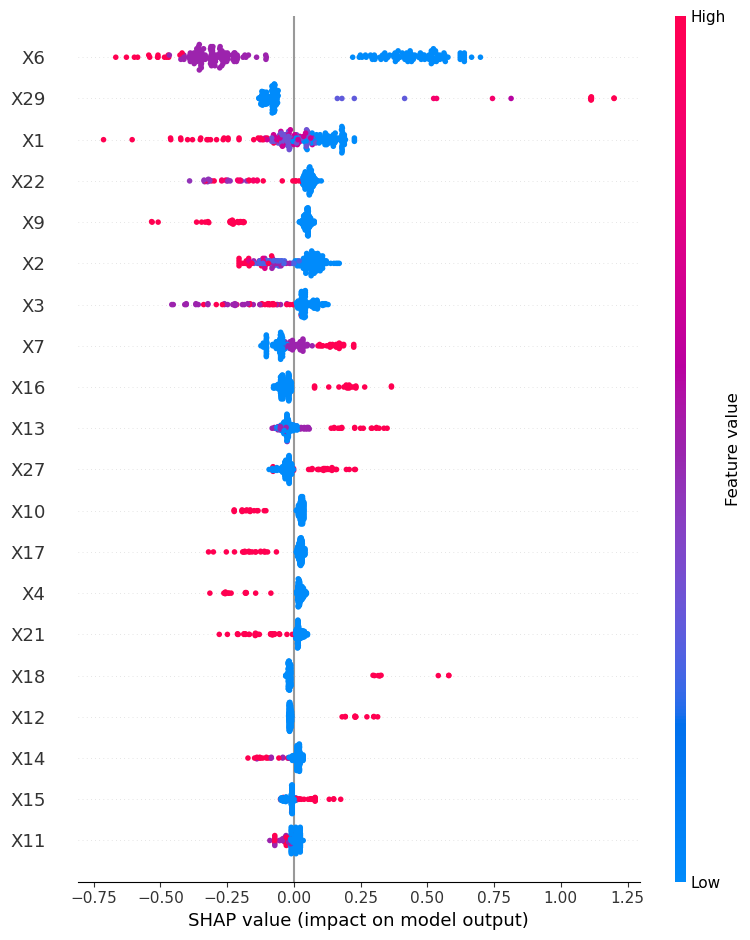

In [13]:
import shap
import matplotlib.pyplot as plt

# 合并 X_train 和 y_train
data = pd.concat([X_train, X_test])

# 创建SHAP解释器对象
explainer = shap.TreeExplainer(best_xgb_reg)

# 获取SHAP值
shap_values = explainer.shap_values(data)

# 可视化SHAP值
shap.summary_plot(shap_values, data)
plt.rcParams['figure.dpi']=600

# 显示可视化图
plt.show()


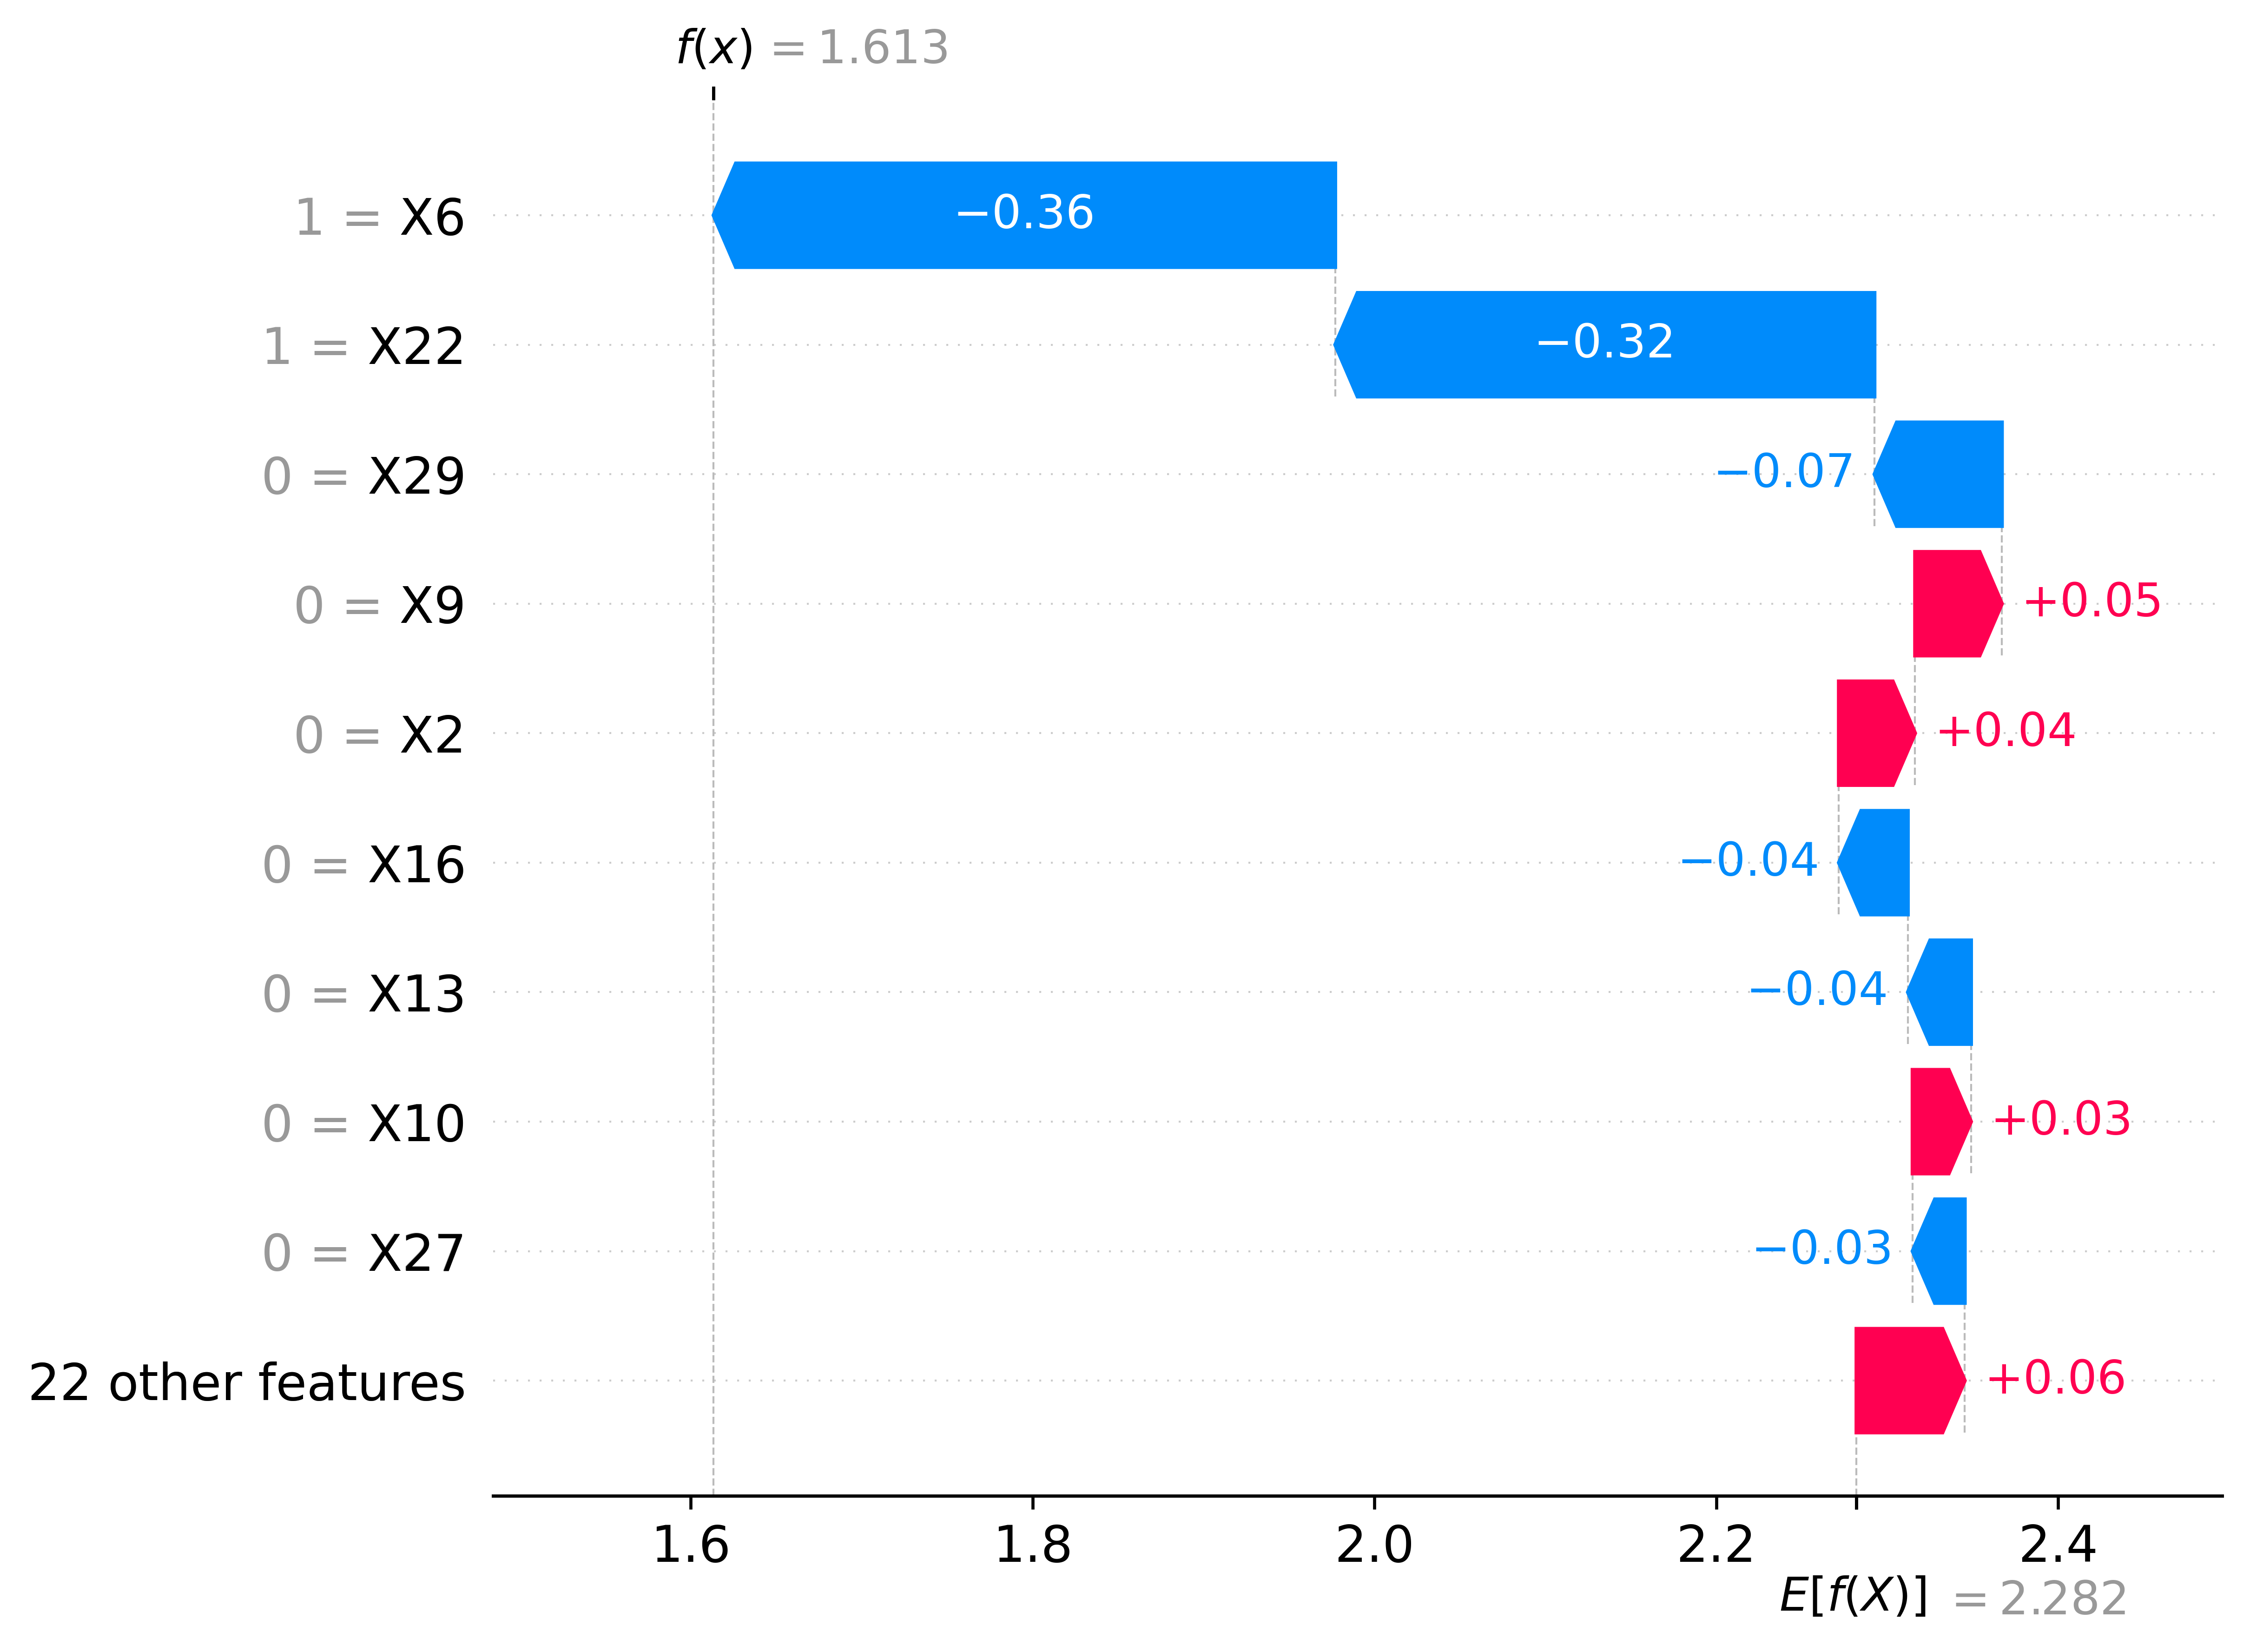

In [14]:
shap_values1 = explainer(data)

# 显示可视化图
shap.plots.waterfall(shap_values1[158])

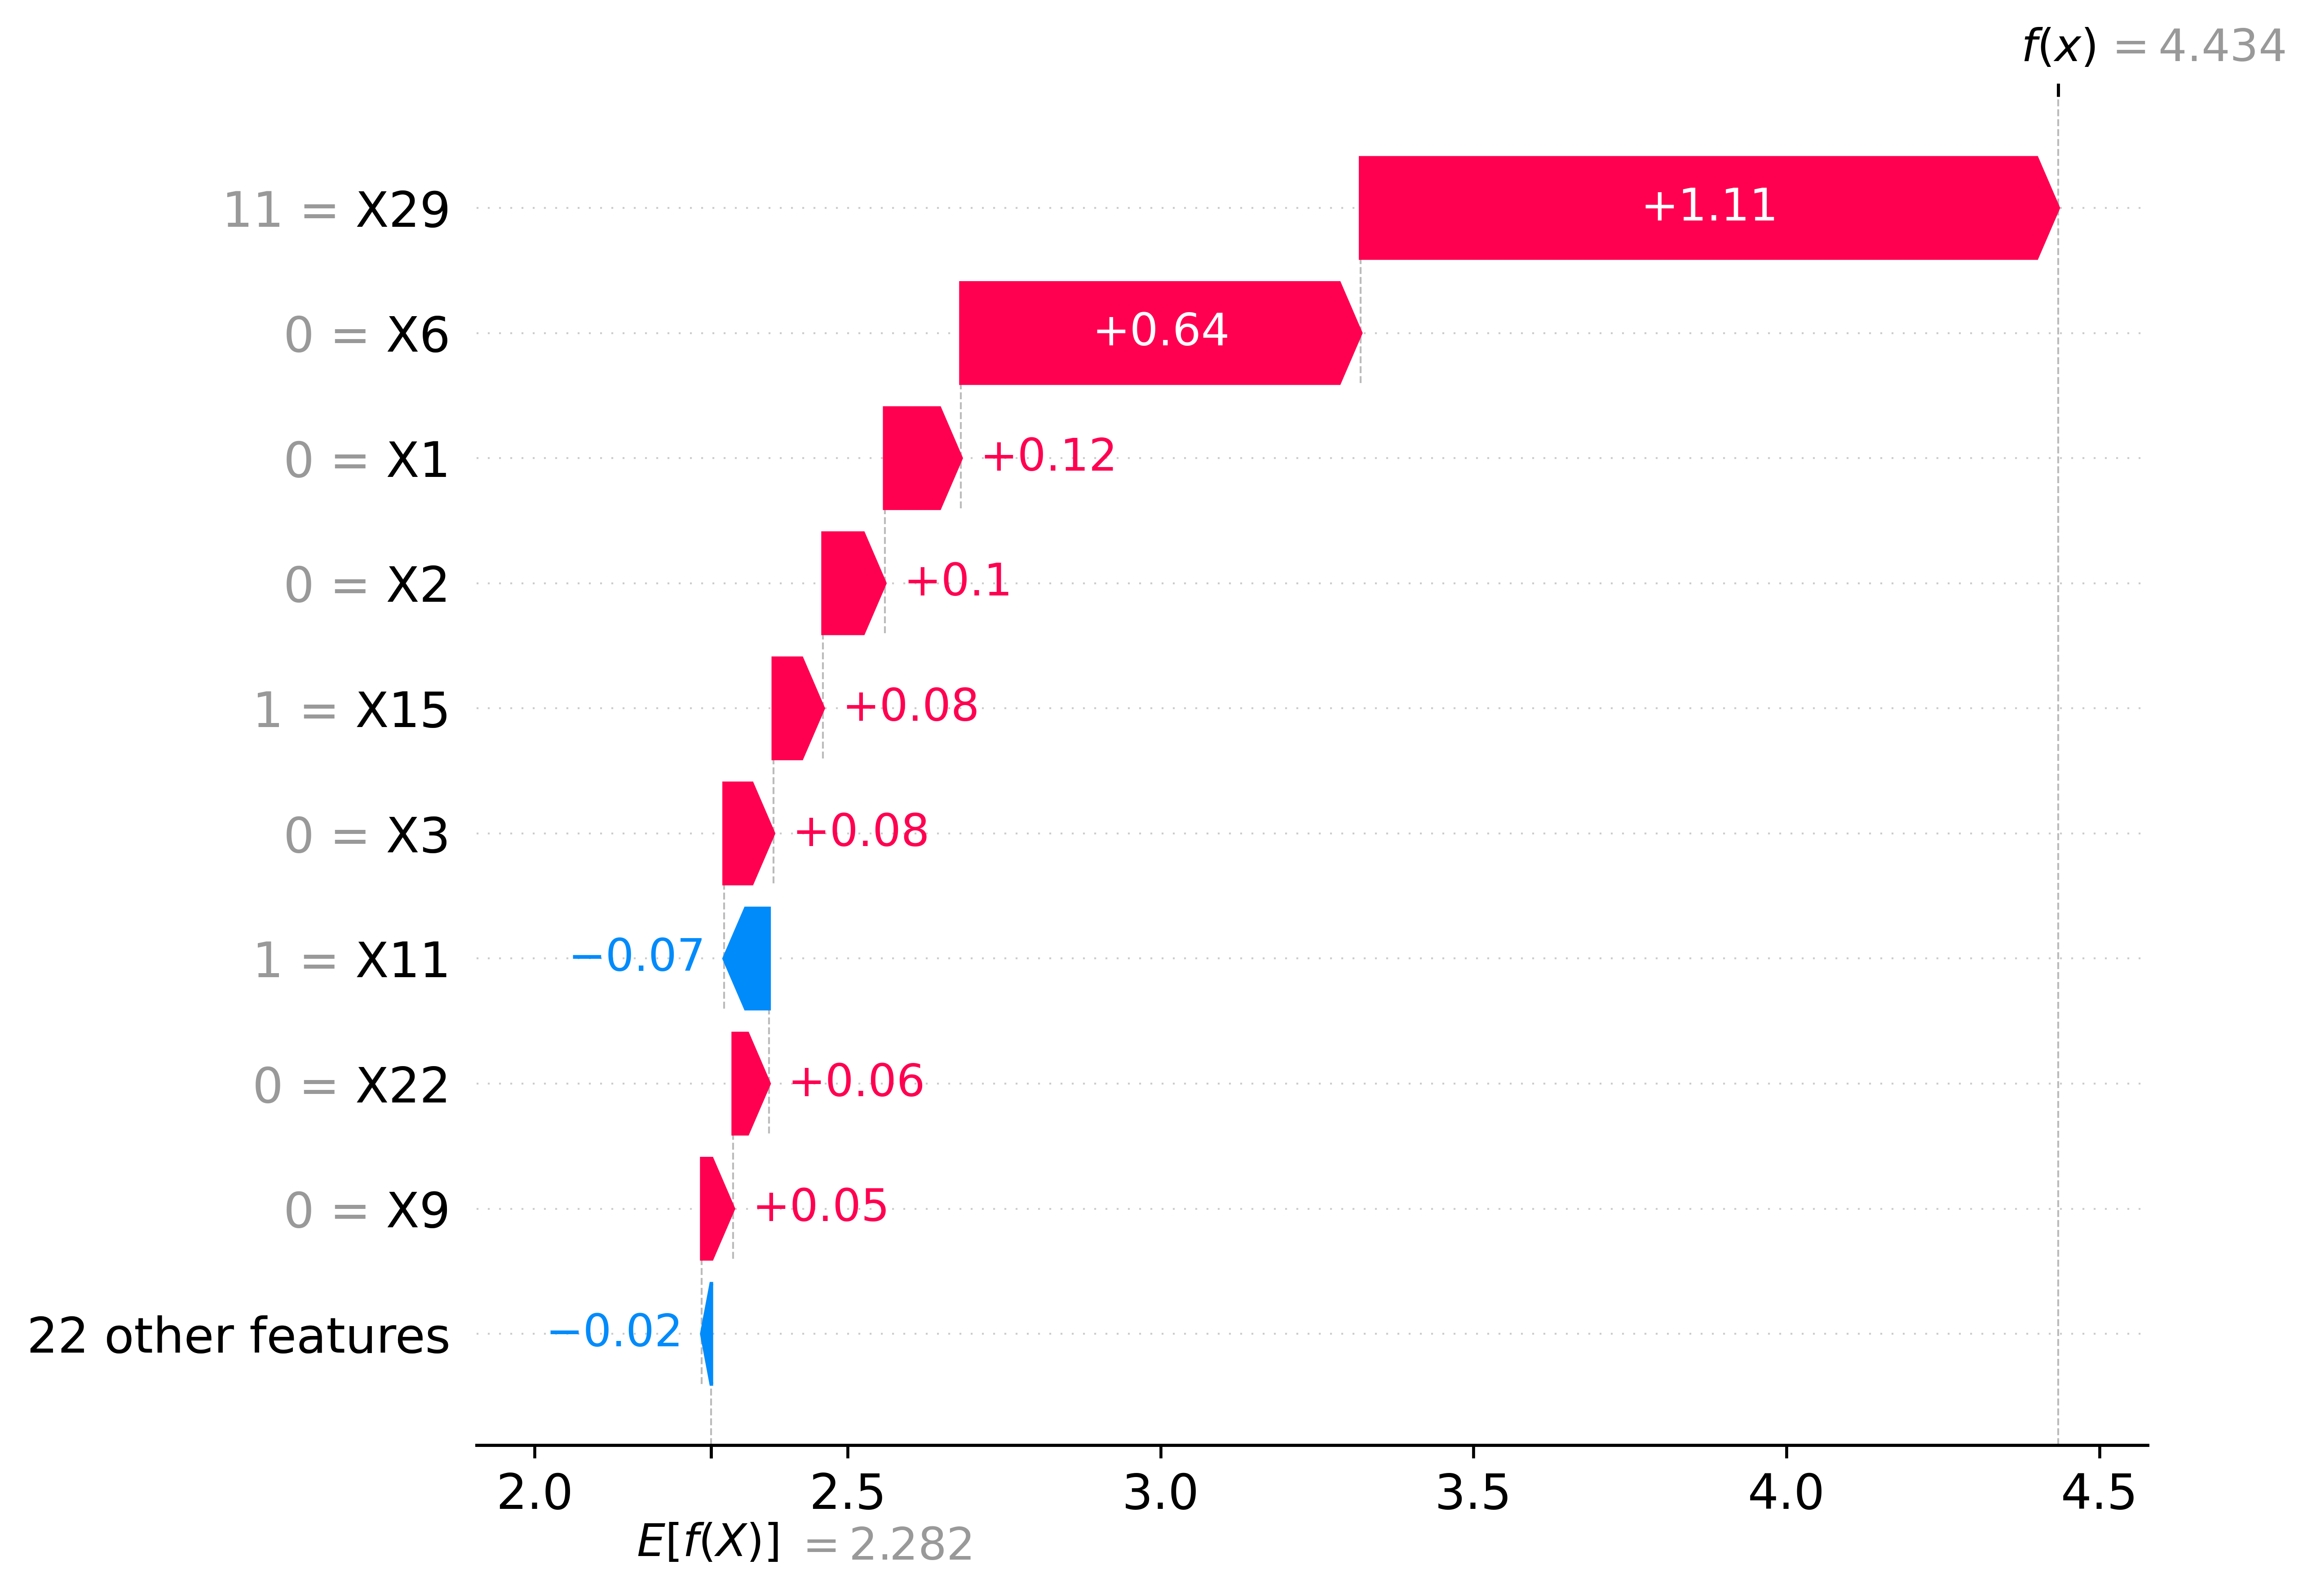

In [15]:
# 显示可视化图
shap.plots.waterfall(shap_values1[162])

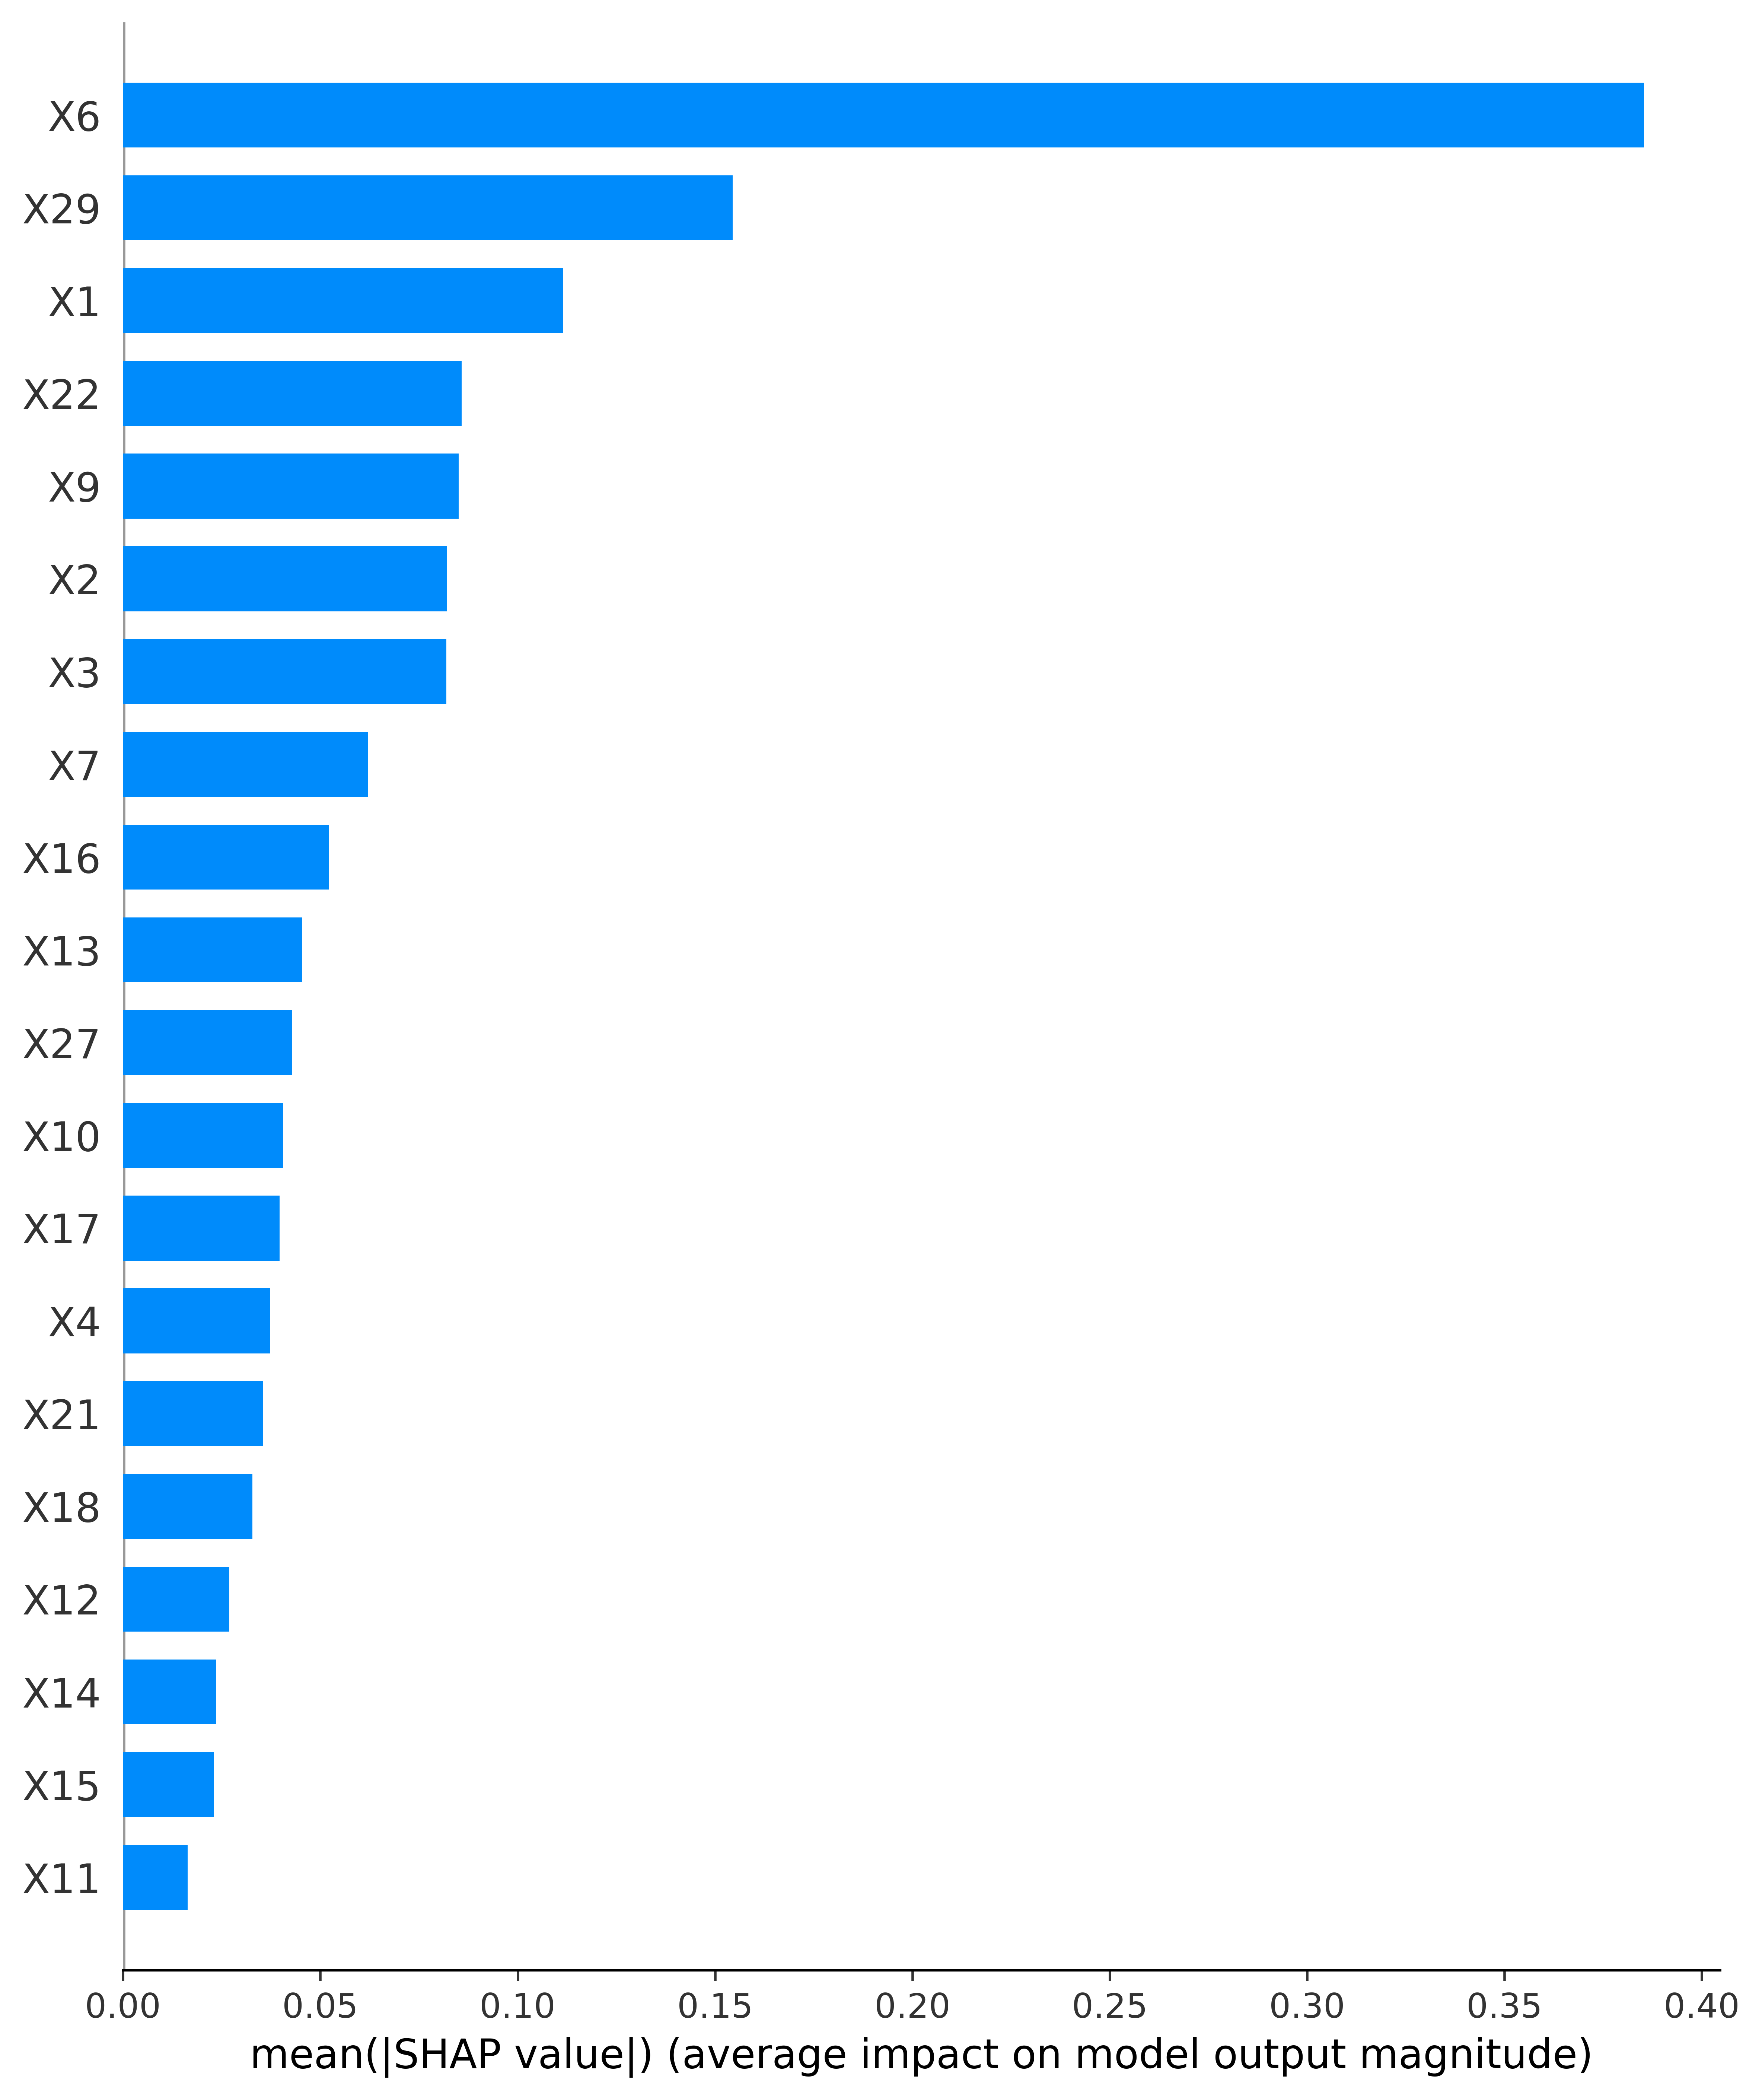

In [31]:
shap.summary_plot(shap_values,data, plot_type="bar")